# Задание
* Разработать SVM-классификатор для набора данных, указанного в варианте методических указаний (для задания 1).
* Разбить выборку на обучающую и тестовую.
* Обучить, проверить качество классификатора на обучающей и тестовой выборках: рассчитать общую точность, Recall, Precision, F1-measure.
* Оценить число опорных векторов.
* Рассмотреть различные типы ядра (линейное, RBF, полиномиальное, сигмоидное (тангенсальное)), различные сочетания значений параметра регуляризации С и параметров ядра. Перебор по сетке (grid search).
* Выбрать лучший классификатор.
* Выполнить визуализацию с помощью t-sne и UMAP (при различных сочетаниях значений их параметров): изобразить объекты разных классов и опорные векторы разных классов разным цветом (разным маркерами).
* Сделать рисунки разбиения на классы на основе выборок с известными метками классов и рисунки разбиения на классы с метками выставленными классификатором.

# Подготовка данных
Импортируем необходимые библиотеки

In [1]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.manifold import TSNE
import umap
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from ast import literal_eval
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_palette('husl')
%matplotlib inline

Загружаем датасет.

In [2]:
data = pd.read_csv('./Data/hepatitis.data', index_col=False, names=['Class', 'Age', 'Sex', 'Steroid', 'Antivrals', 'Fatigue', 'Malaise', 'Anorexia',
                                                                    'Liver big', 'Liver firm', 'Spleen palpable', 'Spiders', 'Ascites', 'Varices', 'Bilirubin', 'Alk phosphate', 'Sgot', 'Albumin', 'Protime', 'Histology'])

In [3]:
data.head()

,Class,Age,Sex,Steroid,Antivrals,Fatigue,Malaise,Anorexia,Liver big,Liver firm,Spleen palpable,Spiders,Ascites,Varices,Bilirubin,Alk phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


Удаляем столбец классов, заменяем пропущенные данные средним значением по столбцу и переназначаем идентификаторы классов.

In [4]:
x = data.drop(['Class'], axis=1)
y = data['Class']

In [5]:
x = x.replace('?', np.nan)
y = y.replace(1, 0)
y = y.replace(2, 1)
for (colName, colData) in x.iteritems():
    x[colName] = x[colName].astype(float)
    x[colName] = x[colName].fillna(x[colName].mean())
    
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [6]:
x.head()

,Age,Sex,Steroid,Antivrals,Fatigue,Malaise,Anorexia,Liver big,Liver firm,Spleen palpable,Spiders,Ascites,Varices,Bilirubin,Alk phosphate,Sgot,Albumin,Protime,Histology
0,0.323944,1.0,0.000000,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.090909,0.219331,0.006309,0.441860,0.618523,0.0
1,0.605634,0.0,0.000000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.077922,0.405204,0.044164,0.325581,0.618523,0.0
2,1.000000,0.0,1.000000,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.051948,0.260223,0.028391,0.441860,0.618523,0.0
3,0.338028,0.0,0.506494,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.051948,0.074349,0.059937,0.441860,0.800000,0.0
4,0.380282,0.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.090909,0.294890,0.293375,0.441860,0.618523,0.0


In [7]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

Разбиваем выборку на обучающую и тестовую.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# UMAP
Уменьшаем размерность данных и визуализируем их посредством **UMAP**

In [9]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(X_test)
embedding.shape

(47, 2)

In [10]:
codes, unique = y_test.factorize()

In [11]:
u_df = pd.DataFrame()
u_df['UMAP X'] = embedding[:, 0]
u_df['UMAP Y'] = embedding[:, 1]
u_df['y'] = y_test.to_numpy()

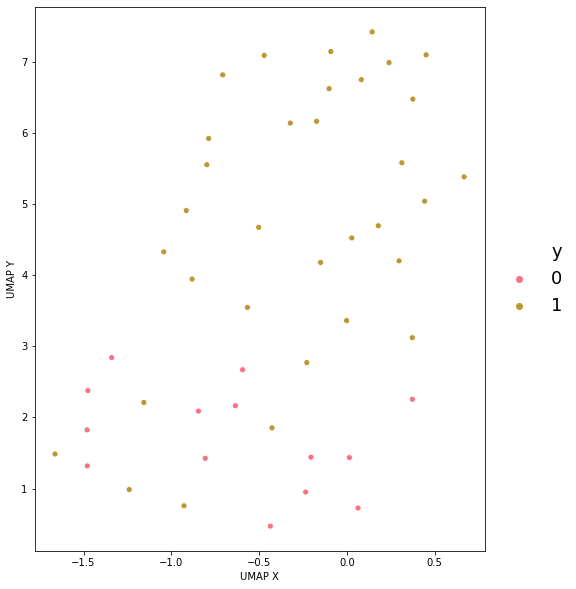

In [12]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x='UMAP X', y='UMAP Y', hue='y', data=u_df)
plt.legend(frameon=False, bbox_to_anchor=(1, 0.5),
           loc="center left", prop={'size': 18})
plt.subplots_adjust(right=0.75)

# T-sne
Уменьшаем размерность данных и визуализируем результат посредством **t-sne**

In [13]:
x_embedded = TSNE(n_components=2, init='pca', random_state=0,
                  learning_rate=1000.0).fit_transform(X_train)

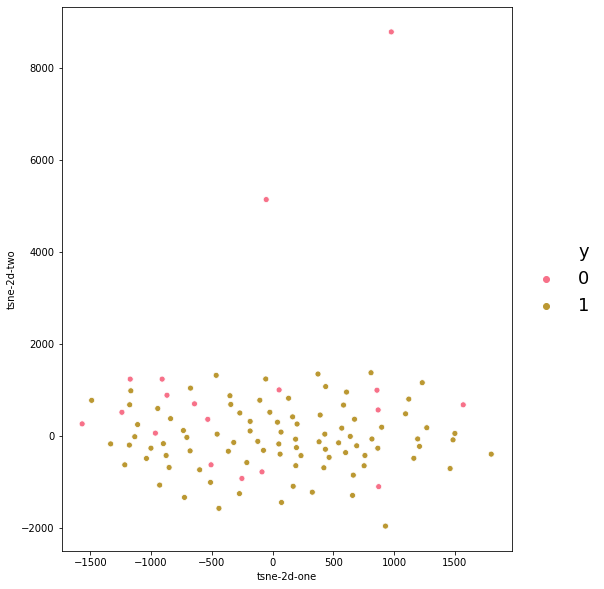

In [14]:
t_df = pd.DataFrame()
t_df['tsne-2d-one'] = x_embedded[:, 0]
t_df['tsne-2d-two'] = x_embedded[:, 1]
t_df['y'] = y_train.to_numpy()

fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x='tsne-2d-one', y='tsne-2d-two', hue='y', data=t_df)
plt.legend(frameon=False, bbox_to_anchor=(1, 0.5),
           loc="center left", prop={'size': 18})
plt.subplots_adjust(right=0.75)

# GridSearch
Подбираем лучшие параметры модели посредством алгоритма **GridSearch**

In [15]:
sv = svm.SVC()
sv.fit(X_train, y_train)
y_pred = sv.predict(X_test)
acc_svm = metrics.accuracy_score(y_pred, y_test)
print('Точность SVM:', acc_svm)

Точность SVM: 0.7021276595744681


In [16]:
parameters = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [
    0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}
clf = GridSearchCV(svm.SVC(), parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [17]:
print(clf.best_params_)
print(clf.best_score_)
print(clf.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'sigmoid'}
0.8701298701298702
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Берем модель с лучшими параметрами из GridSearch

In [18]:
sv = clf.best_estimator_
sv.fit(X_train, y_train)

# Предсказание модели
y_pred = sv.predict(X_test)

# Точность SVM
acc_svm = metrics.accuracy_score(y_pred, y_test, normalize=True)

print('Точность SVM:', acc_svm)

Точность SVM: 0.851063829787234


Результаты классификации

In [19]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        14
           1       0.82      1.00      0.90        33

    accuracy                           0.85        47
   macro avg       0.91      0.75      0.79        47
weighted avg       0.88      0.85      0.83        47



Строим матрицу ошибок

In [20]:
def draw_confusion_matrix(test, pred):
    cm = confusion_matrix(test, pred)
    df_cm = pd.DataFrame(cm, columns=np.unique(test), index=np.unique(test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize=(13, 13))
    sns.set(font_scale=1.4)  # for label size
    sns.heatmap(df_cm, cmap="Blues", annot=True,
                annot_kws={"size": 16})  # font size

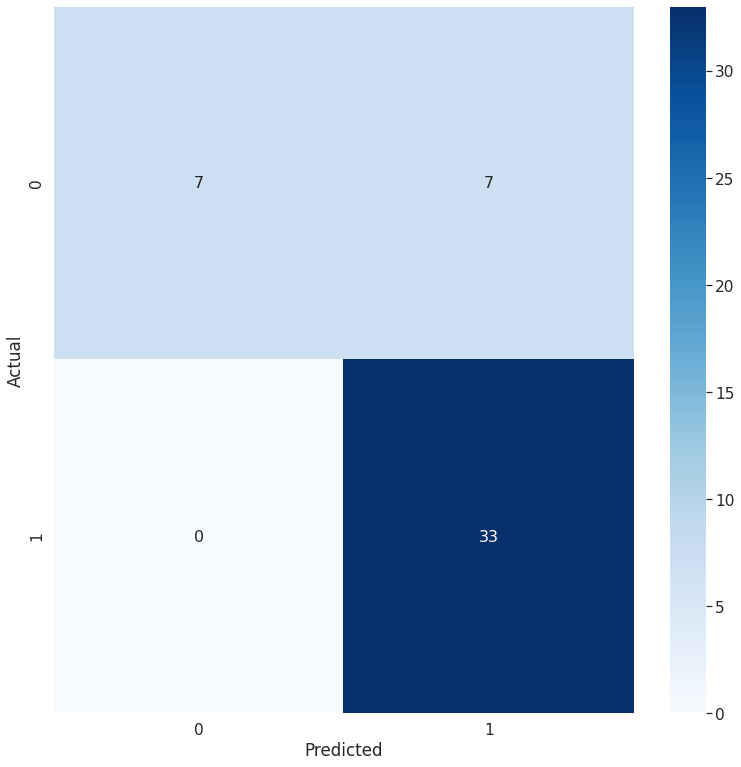

In [21]:
draw_confusion_matrix(y_test, y_pred)

In [22]:
metrics.f1_score(y_test, y_pred, average='weighted')

0.8333819100359467

Зависимость общей точности модели от гиперпараметров

In [23]:
gssh_df = pd.DataFrame(data=clf.cv_results_)

In [24]:
grsh_results_df_2 = gssh_df[['param_C',
                             'param_gamma', 'param_kernel', 'mean_test_score']]

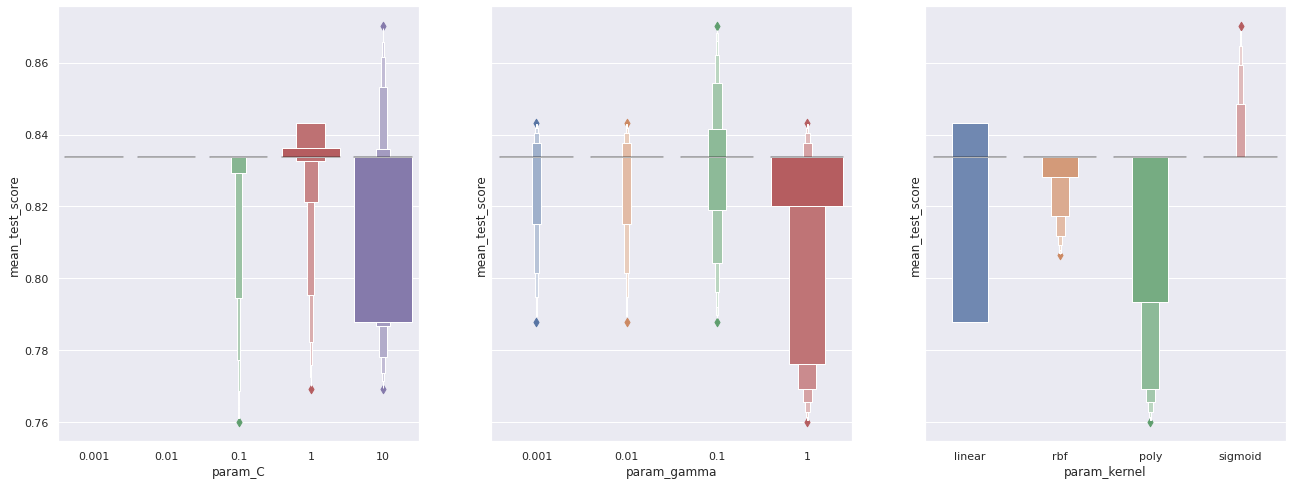

In [25]:
sns.set(rc={'figure.figsize': (22, 8)})
fig, axs = plt.subplots(1, 3, sharey=True)
sns.boxenplot(x=grsh_results_df_2['param_C'],
              y=grsh_results_df_2['mean_test_score'], ax=axs[0])
sns.boxenplot(x=grsh_results_df_2['param_gamma'],
              y=grsh_results_df_2['mean_test_score'], ax=axs[1])
sns.boxenplot(x=grsh_results_df_2['param_kernel'],
              y=grsh_results_df_2['mean_test_score'], ax=axs[2])

# T-sne
Визуализация с различными параметрами

## Perplexity

In [26]:
p = [10, 20, 30, 40]
arr = []
for elem in p:
    x_embedded = TSNE(n_components=2, perplexity=elem).fit_transform(x)

    x_df = pd.DataFrame()
    x_df['tsne-2d-one'] = x_embedded[:, 0]
    x_df['tsne-2d-two'] = x_embedded[:, 1]
    x_df['y'] = y.to_numpy()
    arr.append(x_df)

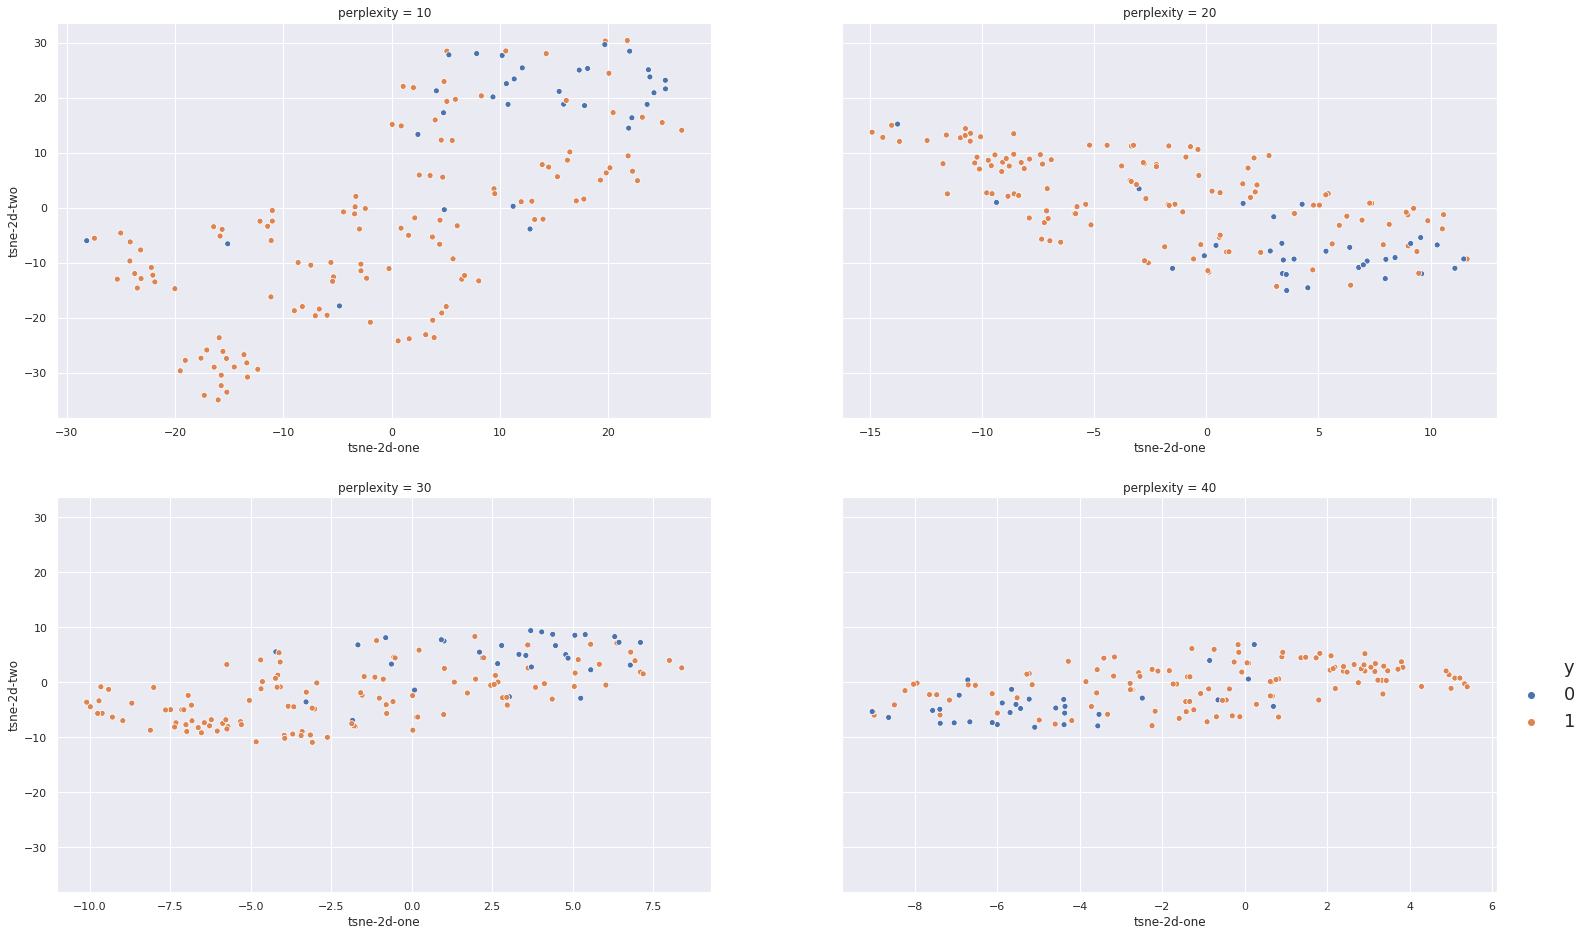

In [28]:
sns.set(rc={'figure.figsize': (32, 16)})
fig, axs = plt.subplots(2, 2, sharey=True)

axs[0, 0].set_title('perplexity = 10')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[0], ax=axs[0, 0], legend=False)

axs[0, 1].set_title('perplexity = 20')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[1], ax=axs[0, 1], legend=False)

axs[1, 0].set_title('perplexity = 30')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[2], ax=axs[1, 0], legend=False)

axs[1, 1].set_title('perplexity = 40')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[3], ax=axs[1, 1], legend="full")
plt.legend(frameon=False, bbox_to_anchor=(1, 0.5),
           loc="center left", prop={'size': 18})
plt.subplots_adjust(right=0.75)

## Learning rate

In [29]:
lr = [10, 100, 250, 500, 750, 1000]
arr = []
for elem in lr:
    x_embedded = TSNE(n_components=2, learning_rate=elem).fit_transform(x)

    x_df = pd.DataFrame()
    x_df['tsne-2d-one'] = x_embedded[:, 0]
    x_df['tsne-2d-two'] = x_embedded[:, 1]
    x_df['y'] = y.to_numpy()
    arr.append(x_df)

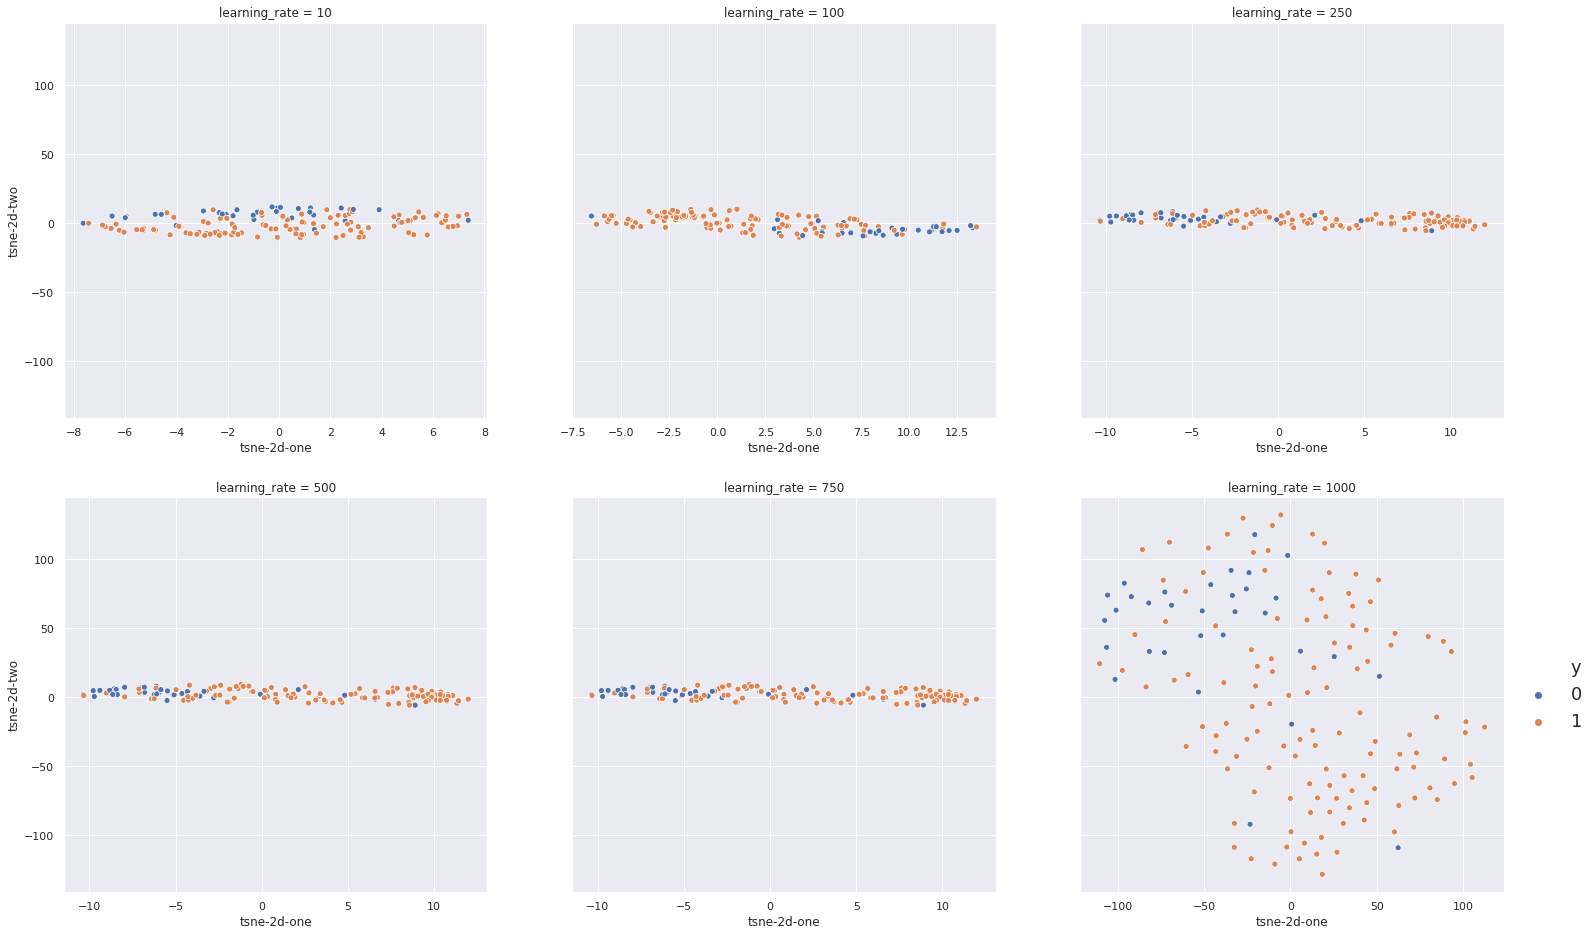

In [30]:
sns.set(rc={'figure.figsize': (32, 16)})
fig, axs = plt.subplots(2, 3, sharey=True)

axs[0, 0].set_title('learning_rate = 10')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[0], ax=axs[0, 0], legend=False)

axs[0, 1].set_title('learning_rate = 100')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[1], ax=axs[0, 1], legend=False)

axs[0, 2].set_title('learning_rate = 250')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[2], ax=axs[0, 2], legend=False)

axs[1, 0].set_title('learning_rate = 500')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[2], ax=axs[1, 0], legend=False)

axs[1, 1].set_title('learning_rate = 750')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[2], ax=axs[1, 1], legend=False)

axs[1, 2].set_title('learning_rate = 1000')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[3], ax=axs[1, 2], legend="full")
plt.legend(frameon=False, bbox_to_anchor=(1, 0.5),
           loc="center left", prop={'size': 18})
plt.subplots_adjust(right=0.75)

## Metrics

In [31]:
m = ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan']
arr = []
for elem in m:
    x_embedded = TSNE(n_components=2, metric=elem).fit_transform(x)

    x_df = pd.DataFrame()
    x_df['tsne-2d-one'] = x_embedded[:, 0]
    x_df['tsne-2d-two'] = x_embedded[:, 1]
    x_df['y'] = y.to_numpy()
    arr.append(x_df)

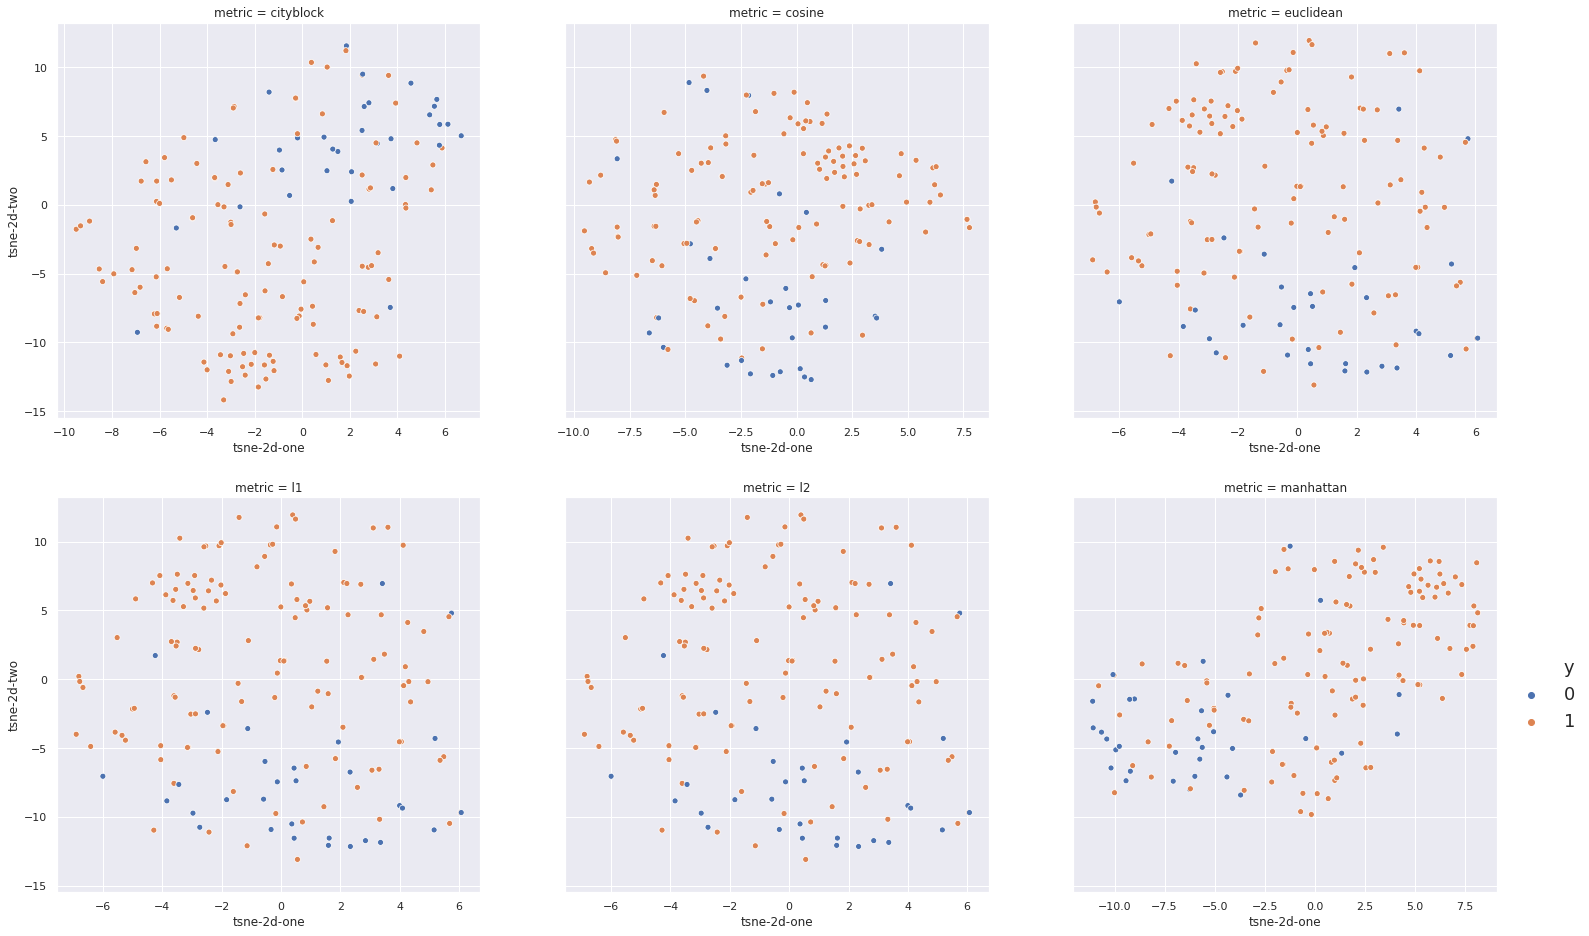

In [32]:
sns.set(rc={'figure.figsize': (32, 16)})
fig, axs = plt.subplots(2, 3, sharey=True)

axs[0, 0].set_title('metric = cityblock')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[0], ax=axs[0, 0], legend=False)

axs[0, 1].set_title('metric = cosine')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[1], ax=axs[0, 1], legend=False)

axs[0, 2].set_title('metric = euclidean')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[2], ax=axs[0, 2], legend=False)

axs[1, 0].set_title('metric = l1')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[2], ax=axs[1, 0], legend=False)

axs[1, 1].set_title('metric = l2')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[2], ax=axs[1, 1], legend=False)


axs[1, 2].set_title('metric = manhattan')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[3], ax=axs[1, 2], legend="full")
plt.legend(frameon=False, bbox_to_anchor=(1, 0.5),
           loc="center left", prop={'size': 18})
plt.subplots_adjust(right=0.75)

## Early exaggeration

In [33]:
ee = [6, 12, 24, 32, 48, 60]
arr = []
for elem in ee:
    x_embedded = TSNE(n_components=2, early_exaggeration=elem).fit_transform(x)

    x_df = pd.DataFrame()
    x_df['tsne-2d-one'] = x_embedded[:, 0]
    x_df['tsne-2d-two'] = x_embedded[:, 1]
    x_df['y'] = y.to_numpy()
    arr.append(x_df)

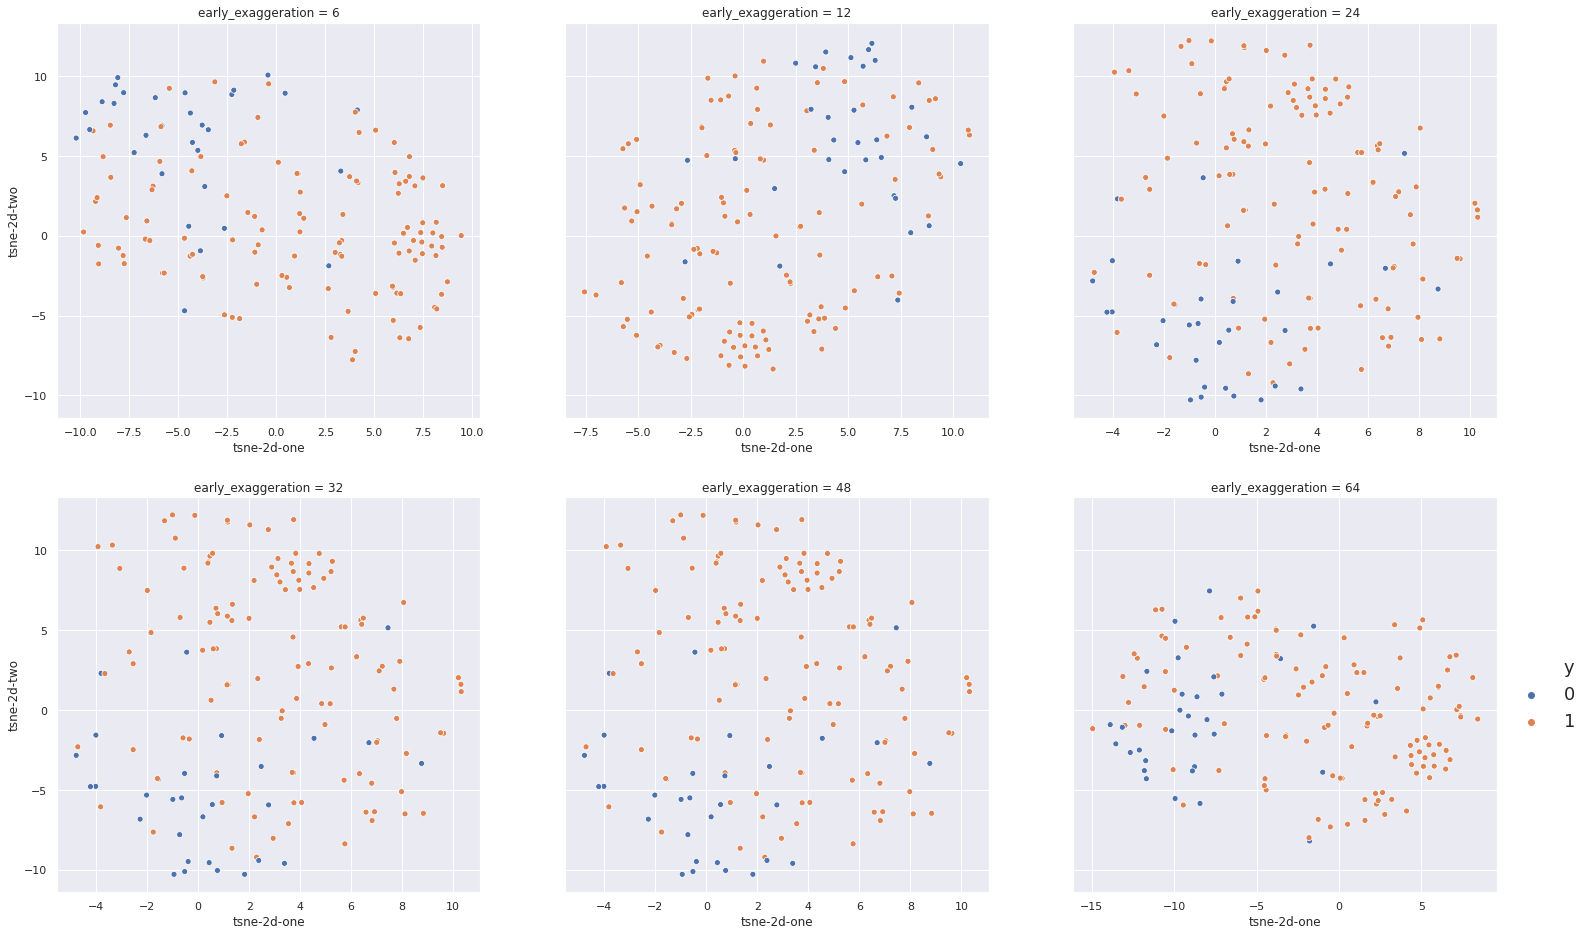

In [34]:
sns.set(rc={'figure.figsize': (32, 16)})
fig, axs = plt.subplots(2, 3, sharey=True)

axs[0, 0].set_title('early_exaggeration = 6')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[0], ax=axs[0, 0], legend=False)

axs[0, 1].set_title('early_exaggeration = 12')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[1], ax=axs[0, 1], legend=False)

axs[0, 2].set_title('early_exaggeration = 24')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[2], ax=axs[0, 2], legend=False)

axs[1, 0].set_title('early_exaggeration = 32')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[2], ax=axs[1, 0], legend=False)

axs[1, 1].set_title('early_exaggeration = 48')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[2], ax=axs[1, 1], legend=False)


axs[1, 2].set_title('early_exaggeration = 64')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[3], ax=axs[1, 2], legend="full")
plt.legend(frameon=False, bbox_to_anchor=(1, 0.5),
           loc="center left", prop={'size': 18})
plt.subplots_adjust(right=0.75)

# UMAP
Визуализация с различными параметрами

## Nearest neighbours

In [35]:
nn = [5, 10, 20, 50, 100, 200]
arr = []
for elem in nn:
    x_embedded = umap.UMAP(n_components=2, n_neighbors=elem).fit_transform(x)

    x_df = pd.DataFrame()
    x_df['tsne-2d-one'] = x_embedded[:, 0]
    x_df['tsne-2d-two'] = x_embedded[:, 1]
    x_df['y'] = y.to_numpy()
    arr.append(x_df)

/mnt/c/Users/User/My projects/Python/IMIZ/venv/lib/python3.6/site-packages/umap/umap_.py:1383: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


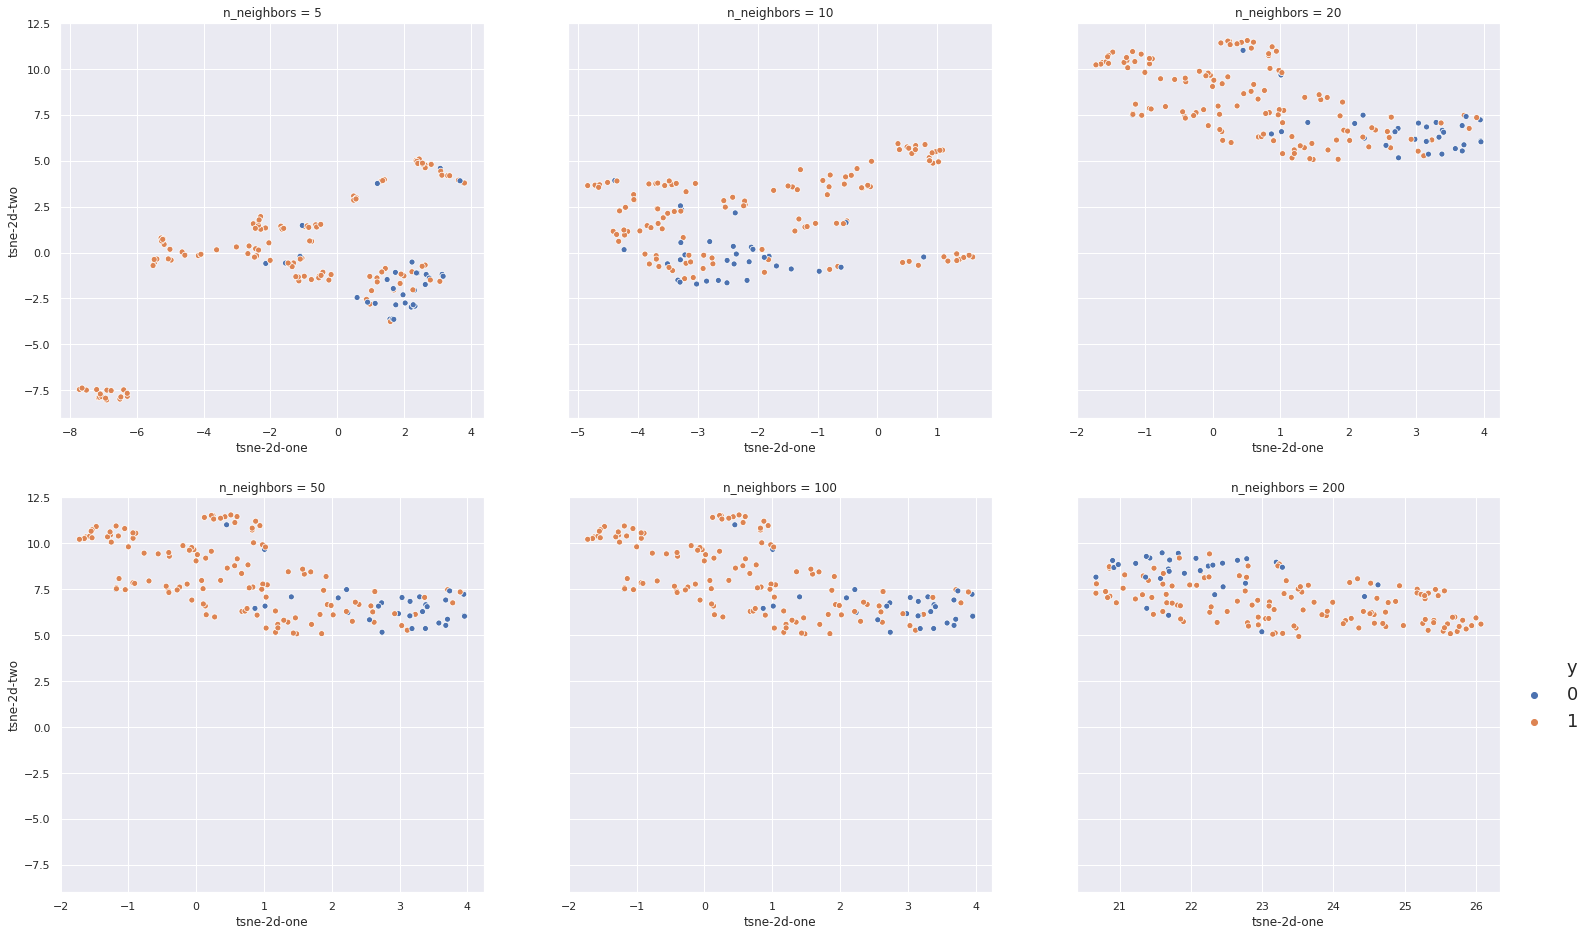

In [36]:
sns.set(rc={'figure.figsize': (32, 16)})
fig, axs = plt.subplots(2, 3, sharey=True)

axs[0, 0].set_title('n_neighbors = 5')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[0], ax=axs[0, 0], legend=False)

axs[0, 1].set_title('n_neighbors = 10')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[1], ax=axs[0, 1], legend=False)

axs[0, 2].set_title('n_neighbors = 20')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[2], ax=axs[0, 2], legend=False)

axs[1, 0].set_title('n_neighbors = 50')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[2], ax=axs[1, 0], legend=False)

axs[1, 1].set_title('n_neighbors = 100')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[2], ax=axs[1, 1], legend=False)


axs[1, 2].set_title('n_neighbors = 200')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[3], ax=axs[1, 2], legend="full")
plt.legend(frameon=False, bbox_to_anchor=(1, 0.5),
           loc="center left", prop={'size': 18})
plt.subplots_adjust(right=0.75)

## Minimal distance

In [37]:
md = [0.0, 0.1, 0.25, 0.5, 0.8, 0.99]
arr = []
for elem in md:
    x_embedded = umap.UMAP(n_components=2, min_dist=elem).fit_transform(x)

    x_df = pd.DataFrame()
    x_df['tsne-2d-one'] = x_embedded[:, 0]
    x_df['tsne-2d-two'] = x_embedded[:, 1]
    x_df['y'] = y.to_numpy()
    arr.append(x_df)

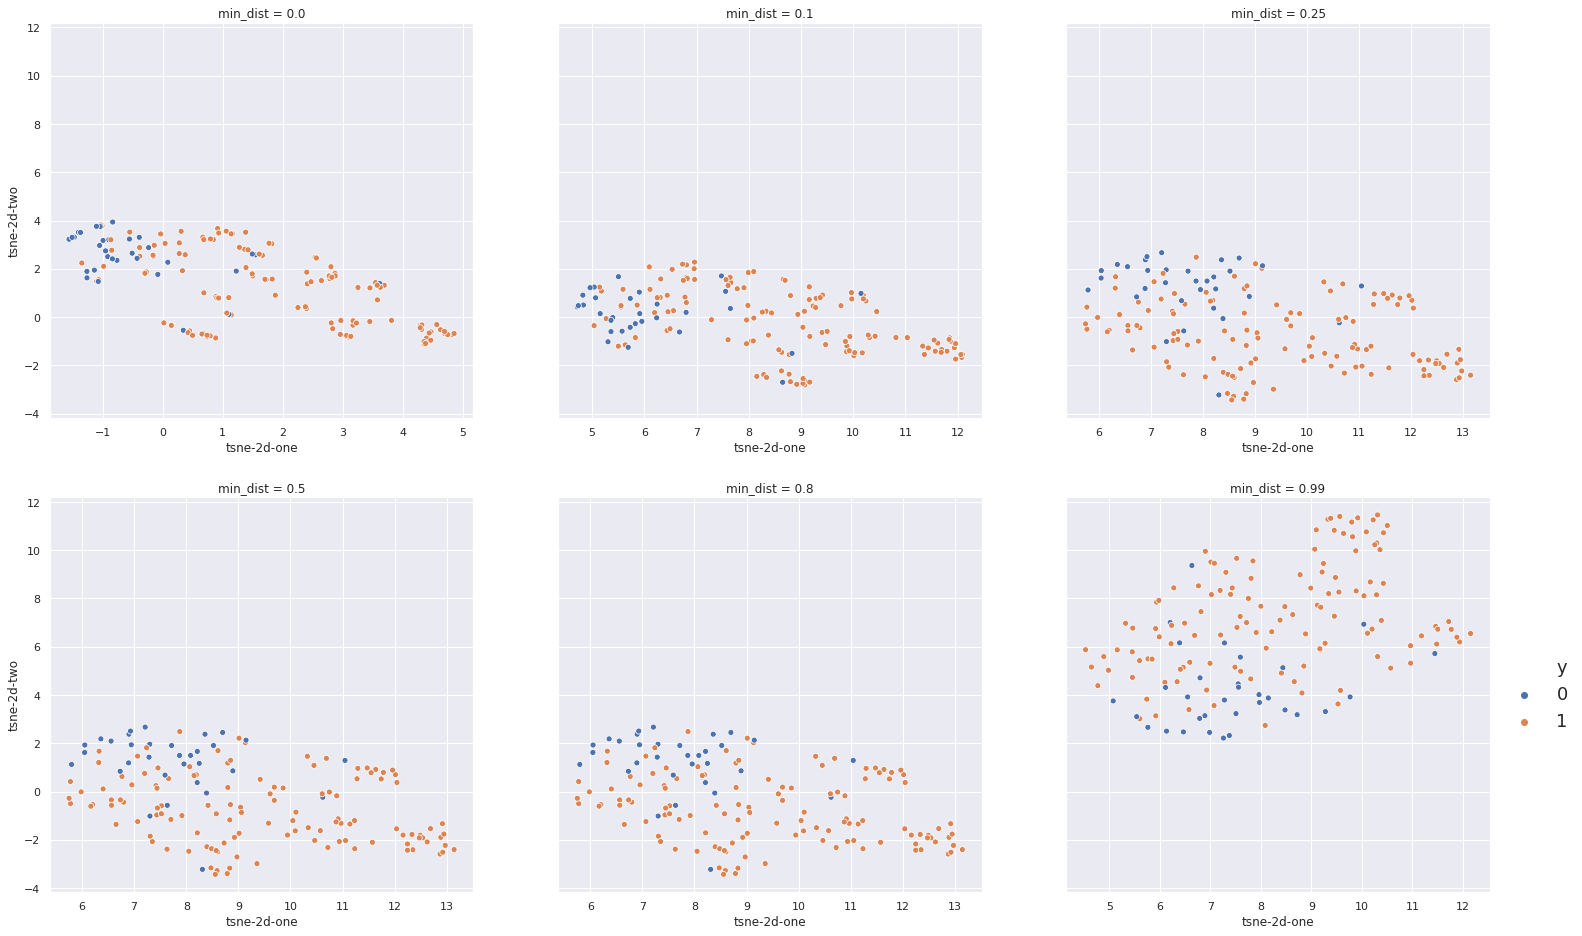

In [38]:
sns.set(rc={'figure.figsize': (32, 16)})
fig, axs = plt.subplots(2, 3, sharey=True)

axs[0, 0].set_title('min_dist = 0.0')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[0], ax=axs[0, 0], legend=False)

axs[0, 1].set_title('min_dist = 0.1')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[1], ax=axs[0, 1], legend=False)

axs[0, 2].set_title('min_dist = 0.25')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[2], ax=axs[0, 2], legend=False)

axs[1, 0].set_title('min_dist = 0.5')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[2], ax=axs[1, 0], legend=False)

axs[1, 1].set_title('min_dist = 0.8')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[2], ax=axs[1, 1], legend=False)


axs[1, 2].set_title('min_dist = 0.99')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[3], ax=axs[1, 2], legend="full")
plt.legend(frameon=False, bbox_to_anchor=(1, 0.5),
           loc="center left", prop={'size': 18})
plt.subplots_adjust(right=0.75)

## Metric

In [39]:
m = ['euclidean', 'manhattan', 'chebyshev',
     'minkowski', 'cosine', 'correlation']
arr = []
for elem in m:
    x_embedded = umap.UMAP(n_components=2, metric=elem).fit_transform(x)

    x_df = pd.DataFrame()
    x_df['tsne-2d-one'] = x_embedded[:, 0]
    x_df['tsne-2d-two'] = x_embedded[:, 1]
    x_df['y'] = y.to_numpy()
    arr.append(x_df)

/mnt/c/Users/User/My projects/Python/IMIZ/venv/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


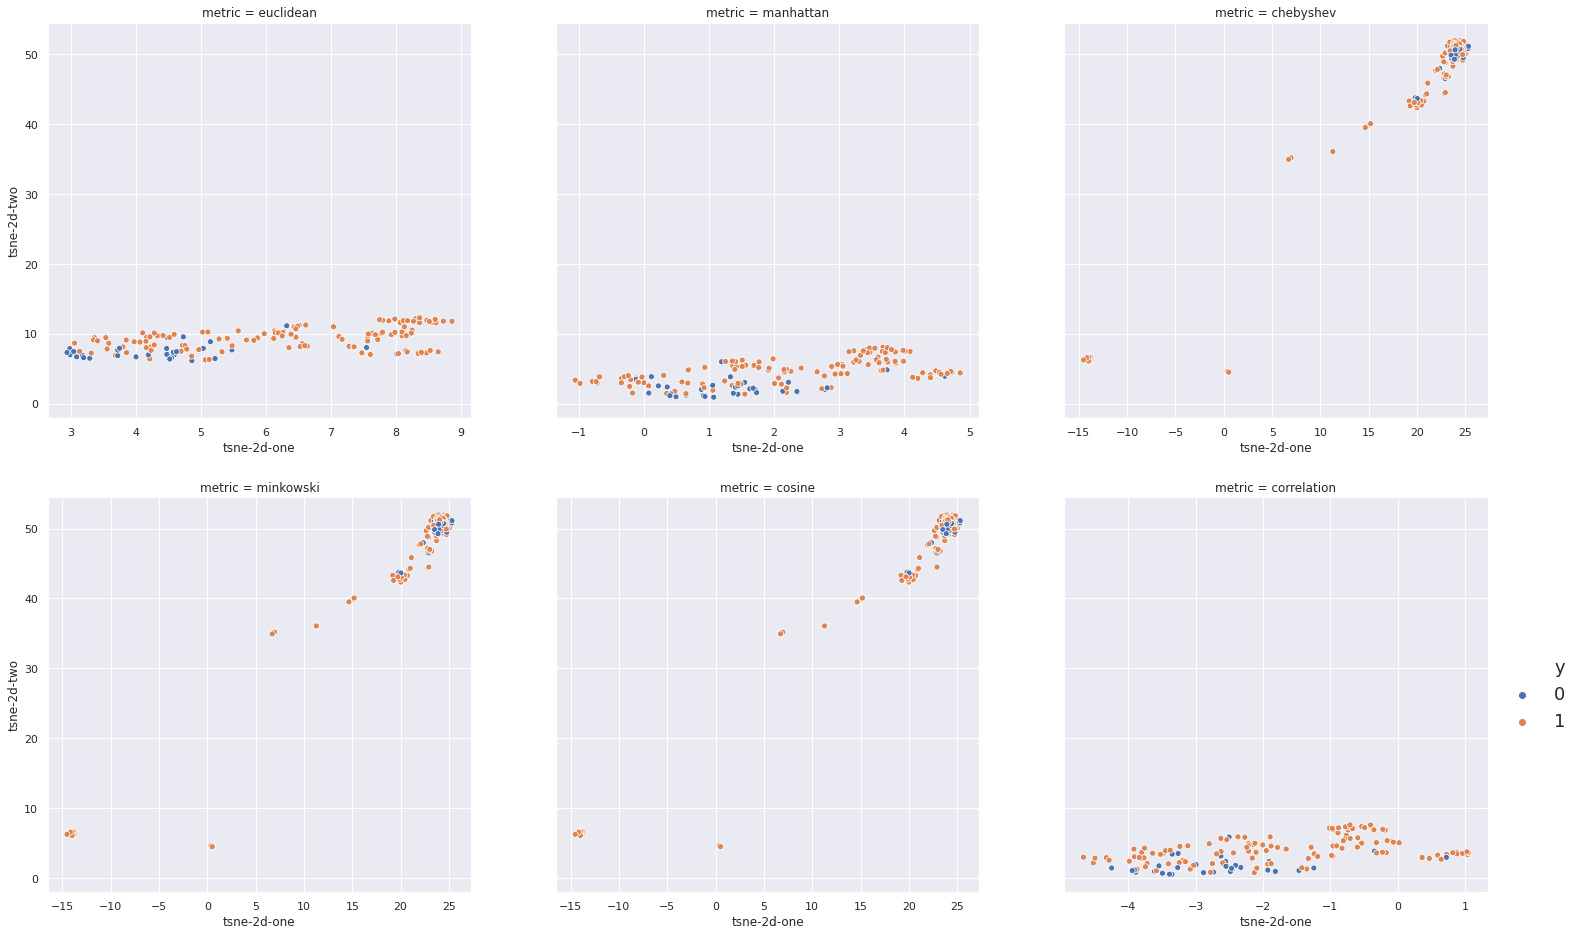

In [40]:
sns.set(rc={'figure.figsize': (32, 16)})
fig, axs = plt.subplots(2, 3, sharey=True)

axs[0, 0].set_title('metric = euclidean')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[0], ax=axs[0, 0], legend=False)

axs[0, 1].set_title('metric = manhattan')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[1], ax=axs[0, 1], legend=False)

axs[0, 2].set_title('metric = chebyshev')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[2], ax=axs[0, 2], legend=False)

axs[1, 0].set_title('metric = minkowski')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[2], ax=axs[1, 0], legend=False)

axs[1, 1].set_title('metric = cosine')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[2], ax=axs[1, 1], legend=False)


axs[1, 2].set_title('metric = correlation')
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="y",
                data=arr[3], ax=axs[1, 2], legend="full")
plt.legend(frameon=False, bbox_to_anchor=(1, 0.5),
           loc="center left", prop={'size': 18})
plt.subplots_adjust(right=0.75)

## Линейное ядро классификатора

In [41]:
kernel = ['linear']
parameters = {'kernel': kernel, 'C': [
    0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}
clf = GridSearchCV(svm.SVC(), parameters)
clf.fit(X_train, y_train)
clf.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
# Берем модель с лучшими параметрами из GridSearch
sv = clf.best_estimator_
sv.fit(X_train, y_train)

# Предсказание модели
y_pred = sv.predict(X_test)

# Точность SVM
acc_svm = metrics.accuracy_score(y_pred, y_test, normalize=True)

print('Точность SVM:', acc_svm)

Точность SVM: 0.8297872340425532


In [43]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.88      0.50      0.64        14
           1       0.82      0.97      0.89        33

    accuracy                           0.83        47
   macro avg       0.85      0.73      0.76        47
weighted avg       0.84      0.83      0.81        47



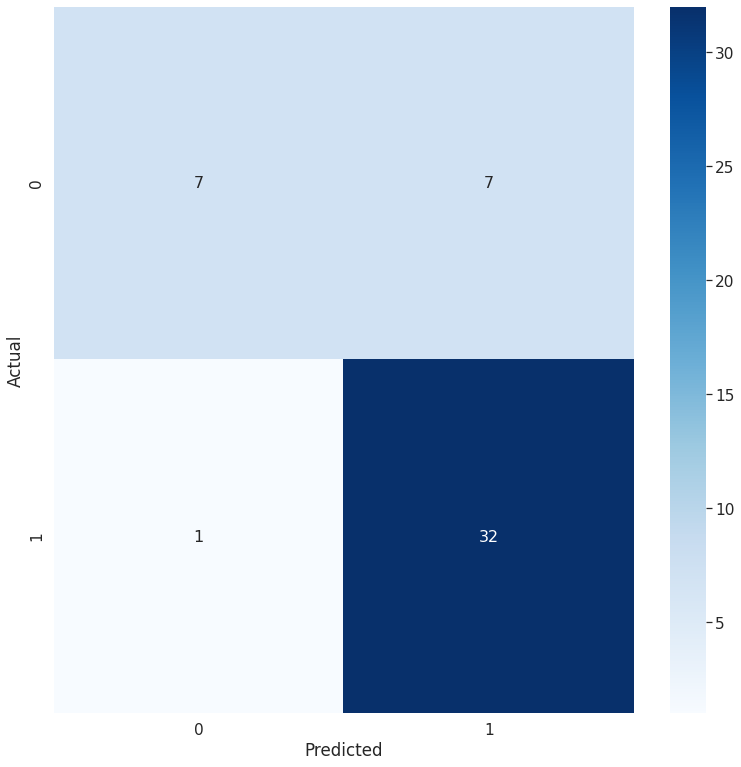

In [44]:
draw_confusion_matrix(y_test, y_pred)

In [45]:
metrics.f1_score(y_test, y_pred, average='weighted')

0.8136686009026435

## Сигмоидное ядро классификатора

In [46]:
kernel = ['sigmoid']
parameters = {'kernel': kernel, 'C':[0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}
clf = GridSearchCV(svm.SVC(), parameters)
clf.fit(X_train, y_train)
clf.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
# Берем модель с лучшими параметрами из GridSearch
sv = svm.SVC(kernel='sigmoid')
sv.fit(X_train, y_train)

# Предсказание модели
y_pred = sv.predict(X_test)

# Точность SVM
acc_svm = metrics.accuracy_score(y_pred, y_test, normalize=True)

print('The accuracy of the SVM is:', acc_svm)

The accuracy of the SVM is: 0.7021276595744681


In [48]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.70      1.00      0.82        33

    accuracy                           0.70        47
   macro avg       0.35      0.50      0.41        47
weighted avg       0.49      0.70      0.58        47



/mnt/c/Users/User/My projects/Python/IMIZ/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


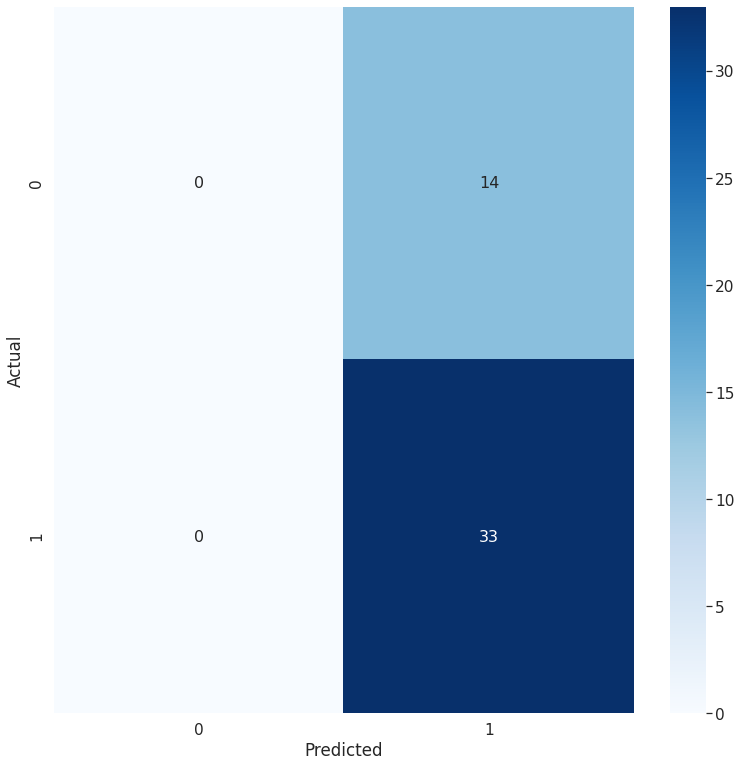

In [49]:
draw_confusion_matrix(y_test, y_pred)

In [50]:
metrics.f1_score(y_test, y_pred, average='weighted')

0.5792553191489361

## Полиномиальное ядро классификатора

In [51]:
kernel = ['poly']
parameters = {'kernel': kernel, 'C': [
    0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}
clf = GridSearchCV(svm.SVC(), parameters)
clf.fit(X_train, y_train)
clf.best_estimator_

SVC(C=0.001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [52]:
# Берем модель с лучшими параметрами из GridSearch
sv = clf.best_estimator_
sv.fit(X_train, y_train)

# Предсказание модели
y_pred = sv.predict(X_test)

# Точность SVM
acc_svm = metrics.accuracy_score(y_pred, y_test, normalize=True)

print('Точность SVM:', acc_svm)

Точность SVM: 0.7021276595744681


In [53]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.70      1.00      0.82        33

    accuracy                           0.70        47
   macro avg       0.35      0.50      0.41        47
weighted avg       0.49      0.70      0.58        47



/mnt/c/Users/User/My projects/Python/IMIZ/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


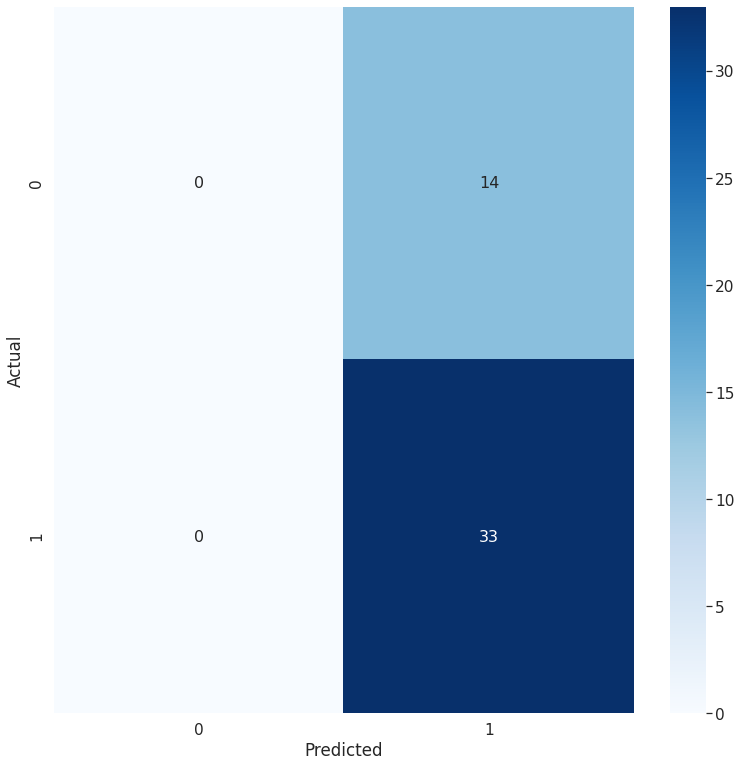

In [54]:
draw_confusion_matrix(y_test, y_pred)

In [55]:
metrics.f1_score(y_test, y_pred, average='weighted')

0.5792553191489361